<h1 style="color:#1E90FF; font-weight:bold;">BTS</h1>
<h2 style="color:#1E90FF; font-weight:bold;">MBDS - Big Data & AI</h2>
<h3 style="color:#1E90FF; font-weight:bold;">Statistics for DS - Assignment 2 - EDA on Dating Profiles</h3>
<h4 style="color:#1E90FF; font-weight:bold;">Pablo Ruiz Lopez</h4>

In this notebook, we will conduct a comprehensive analysis of a dataset comprising dating profiles, utilizing basic Exploratory Data Analysis (EDA) techniques. Our objective is to uncover prevailing trends, examine potential correlations, and identify distinctive characteristics associated with specific variables. By doing so, we aim to derive insightful and engaging findings from this concise dataset.

<p align="center">
	<img src="https://images.unsplash.com/photo-1571771826307-98d0d0999028?auto=format&fit=crop&q=80&w=1000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8NHx8ZGF0aW5nfGVufDB8fDB8fHww" alt="200" width="400"/>
</p>

## **EDA and Steps to Take**

Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and graph plots to find trends, anomalies, patterns, or relationships within the data. The insights from this step influence the choice of feature engineering and modeling. Given your dataset, which seems to be related to dating profiles, here is a structured approach to perform EDA.

So, without further due, let's begin!

### 1. **Understanding the Variables**:
   - **Objective**: Understand the context and characteristics of each variable and get the data types we will be working with.
   - Actions to Take:
     - Review the data dictionary or source of data to understand the intended meaning of each column.
     - Identify which columns are categorical and which ones are numerical.

In [1]:
## Setup for non-standard packages
# !pip install ipywidgets
# !pip install ydata_profiling
# !pip install ipykernel

In [2]:
# Imports
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Magic commands 
%matplotlib inline

In [3]:
# Reading the CSV file
dating_df = pd.read_csv('dating_profiles.csv')

In [4]:
# Reading the first columns of the dataset for initial inspection
dating_df.head()

,Unnamed: 0,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,sign
0,0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",gemini
1,1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",cancer
2,2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",pisces but it doesn&rsquo;t matter
3,3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",pisces
4,4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",aquarius


In [5]:
# Getting dataframe info
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   59946 non-null  int64  
 1   age          59946 non-null  int64  
 2   status       59946 non-null  object 
 3   sex          59946 non-null  object 
 4   orientation  59946 non-null  object 
 5   body_type    54650 non-null  object 
 6   diet         35551 non-null  object 
 7   drinks       56961 non-null  object 
 8   drugs        45866 non-null  object 
 9   education    53318 non-null  object 
 10  ethnicity    54266 non-null  object 
 11  height       59943 non-null  float64
 12  income       59946 non-null  int64  
 13  job          51748 non-null  object 
 14  last_online  59946 non-null  object 
 15  location     59946 non-null  object 
 16  sign         48890 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 7.8+ MB


### **Data Overview**:
- **Dataset Name**: "Dating Profiles"
- **Number of Entries**: 59,946 records.
- **Total Columns**: 17.
- **Type of File**: CSV

### **Variable Descriptions**:

| Variable    | Description                                                        | Datatype     | Additional Observations |
|-------------|--------------------------------------------------------------------|--------------|------------------------|
| `Unnamed: 0`  | Auto-generated index or identifier for each record.                 | int64        |                        |
| `age`         | Age of the individual.                                             | int64        |                        |
| `status`      | Relationship status (e.g., single, married).                       | object       |                        |
| `sex`         | Gender of the individual (e.g., male, female).                     | object       |                        |
| `orientation` | Sexual orientation (e.g., straight, gay).                          | object       |                        |
| `body_type`   | Body type or physique (e.g., athletic, slim).                      | object       | Contains null values.  |
| `diet`        | Dietary habits (e.g., vegetarian, omnivore).                       | object       | Contains null values.  |
| `drinks`      | Drinking habits (e.g., frequently, never).                         | object       | Contains null values.  |
| `drugs`       | Drug usage habits (e.g., never, sometimes).                        | object       | Contains null values.  |
| `education`   | Educational qualification/status (e.g., bachelor's, master's).     | object       | Contains null values.  |
| `ethnicity`   | Ethnic background (e.g., Caucasian, Asian).                        | object       | Contains null values.  |
| `height`      | Height of the individual in standard measurement.                  | float64      | Contains few nulls.    |
| `income`      | Income or salary bracket of the individual.                        | int64        |                        |
| `job`         | Occupation or job title of the individual.                         | object       | Contains null values.  |
| `last_online` | Timestamp of the last online activity.                             | object       |                        |
| `location`    | Geographical location or residence.                                | object       |                        |
| `sign`        | Astrological zodiac sign (e.g., Aries, Taurus).                    | object       | Contains null values.  |



#### **Initial Observations**:
- Many columns, such as `body_type`, `diet`, `drugs`, `education`, `ethnicity`, `job`, and `sign`, have missing values, suggesting that users might have opted not to provide this information in their profiles.

- While some columns like `age`, `income`, and `height` are numeric, most of the columns are of object datatype, indicating categorical or string data.
- Detailed exploration will be required to understand the nature of null values (random or systematic) and decide on imputation methods if necessary.

### **Data Pre-Processing**

Before diving into Exploratory Data Analysis (EDA), it's essential to pre-process the dataset. Based on our observations and understanding of each variable, we'll implement the following actions to prepare our dataset:

- **Dropping Non Meaningfull Columns:**
  - First column `Unnamed 0:` is mostlikely auto-generated and not useful at all.
  - Additionally, the `last_online` column will be dropped since it provides a level of granularity and information that is not necessary for this specific exercise.

- **Handling Missing Values in Numerical Columns:** 
  - The only numerical column with missing values is `height`. Given the minimal data loss (only 3 rows), we'll remove these rows. This approach simplifies our computations without significant data loss.

- **Handling Missing Values in Categorical Columns:**
  - As for other columns with missing values, we infer these might be deliberate omissions by users. We'll impute these as 'Unknown' to ensure clarity during analysis.

In [6]:
# Dropping non useful columns
dating_df.drop(columns=['Unnamed: 0', 'last_online'], inplace=True)

# Dropping rows where height is null since it's the only numerical column with null values
dating_df.dropna(subset=['height'], inplace=True)

# Imputting null values for the categorical columns
dating_df.fillna('unknown', inplace=True)

# Resetting index for data profiling
dating_df.reset_index(drop=True, inplace=True)

Now let's explore what do we have left in the pandas DataFrame

In [7]:
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59943 non-null  int64  
 1   status       59943 non-null  object 
 2   sex          59943 non-null  object 
 3   orientation  59943 non-null  object 
 4   body_type    59943 non-null  object 
 5   diet         59943 non-null  object 
 6   drinks       59943 non-null  object 
 7   drugs        59943 non-null  object 
 8   education    59943 non-null  object 
 9   ethnicity    59943 non-null  object 
 10  height       59943 non-null  float64
 11  income       59943 non-null  int64  
 12  job          59943 non-null  object 
 13  location     59943 non-null  object 
 14  sign         59943 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.9+ MB


In [8]:
dating_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,location,sign
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"south san francisco, california",gemini
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"oakland, california",cancer
2,38,available,m,straight,thin,anything,socially,unknown,graduated from masters program,unknown,68.0,-1,unknown,"san francisco, california",pisces but it doesn&rsquo;t matter
3,23,single,m,straight,thin,vegetarian,socially,unknown,working on college/university,white,71.0,20000,student,"berkeley, california",pisces
4,29,single,m,straight,athletic,unknown,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,"san francisco, california",aquarius


Ok! Our DataFrame seems to be ready for action! 

### **Data Quick Profiling**

A crucial initial step I often take is leveraging specialized and amazing libraries for rapid data profiling. This gives me a holistic view of our dataset, sets my expectations, and provides insight into what I might encounter next.

For this purpose, I'll use a handy library named [y_data_profiling](https://github.com/ydataai/ydata-profiling), which has proven invaluable in previous projects. The profiling report will be embedded directly in this Jupyter notebook as a widget. Additionally, an HTML version of the report will be available, ensuring easy accessibility from any web browser. If desired, this file can be added to the associated GitHub repository.

I highly encourage you to play around with it and explore different options in the widgets!

In [9]:
# Creating the data profiling
profile = ProfileReport(dating_df, title="Profiling Report")

profile.to_widgets() # Displaying the profile in the Jupyter notebook
profile.to_file("dating_df_profiling_output.html") # Saving the profiling in an html file

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Very interesting!

### 2. **Univariate Analysis**:
   - **Objective**: Understand the distribution of individual variables.
   
   - Actions to Take:
     - For categorical variables: we will use bar plots to visualize frequency distribution.
       - We will check the distribution of `status`, `sex`, `orientation`, etc.
     - For numerical variables: we will use histograms and box plots to visualize distributions.
       - We will Look at the distribution of `age`, `income`, and `height`.
     - Lastly, we will check for any anomalies or unexpected values. E.g., negative values for `age` or `height`.

In [10]:
def plot_categorical_distribution(df: pd.DataFrame, column: str) -> None:
    """
    Plot a bar chart for a categorical column using seaborn.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the categorical column.

    Returns:
        None: It will just plot the chart.
    """
    
    # Setting style
    sns.set_style("whitegrid")

    # Initialize the figure
    plt.figure(figsize=(8, 4))
    
    # Creating the bar plot
    ax = sns.countplot(data=df, x=column, 
                       palette="pastel", 
                       order=df[column].value_counts().index)
    
    # Placing the value of each bar on top
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center",
                fontsize=10) 

    # Title, axis and labels setting
    ax.set_title(f"Distribution of {column.capitalize()}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Adjusting the fontsize of tick labels
    plt.xticks(rotation=45, ha='right')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10) 

    # Displaying the plot
    plt.tight_layout()
    plt.show()

##### **Categorical Data Visualization:**

Before generating bar plots for our categorical columns, it's essential to gauge the number of unique values each column possesses. The rationale is straightforward: plotting columns with an excessively high count of distinct values can lead to cluttered visuals with potentially hundreds of bins. To maintain clarity and coherence, we'll focus on columns that contain fewer than 30 unique values.

In [11]:
# Filtering columns based on unique values less than 30 and 'object' datatype
filtered_columns_low_uniques = [col for col in dating_df.columns if dating_df[col].dtype == 'object' and 
                                dating_df[col].nunique() < 30]

print(filtered_columns_low_uniques)

['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'job']


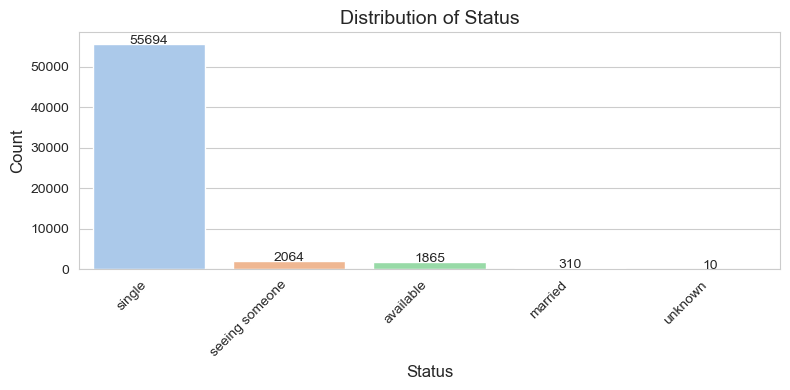

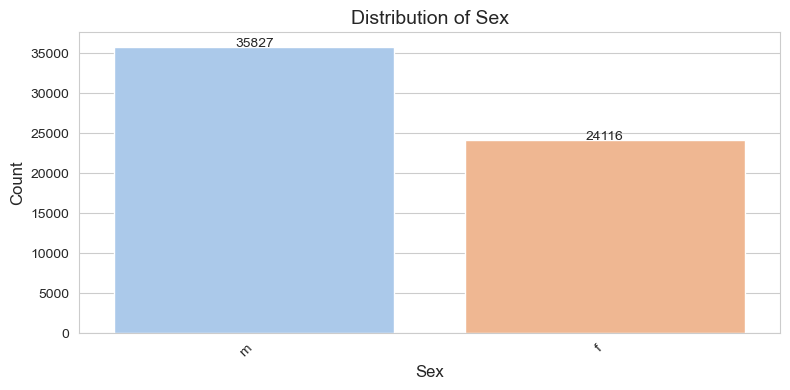

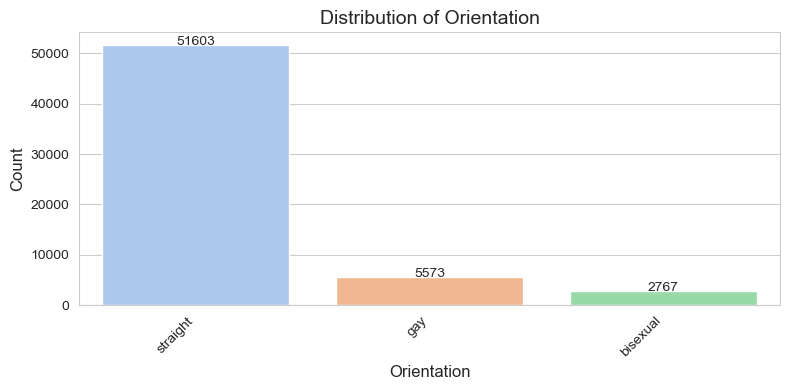

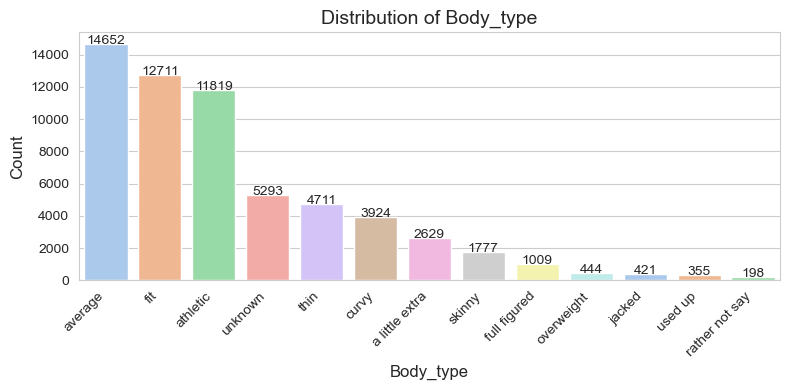

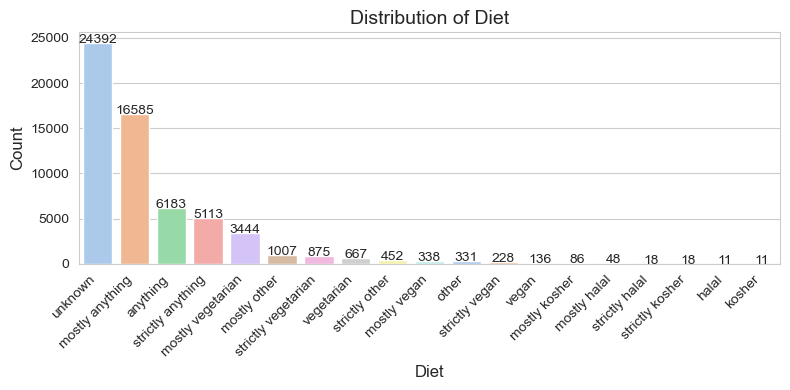

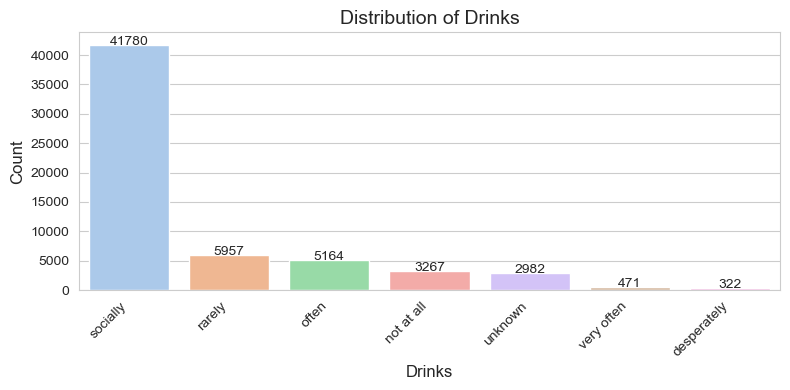

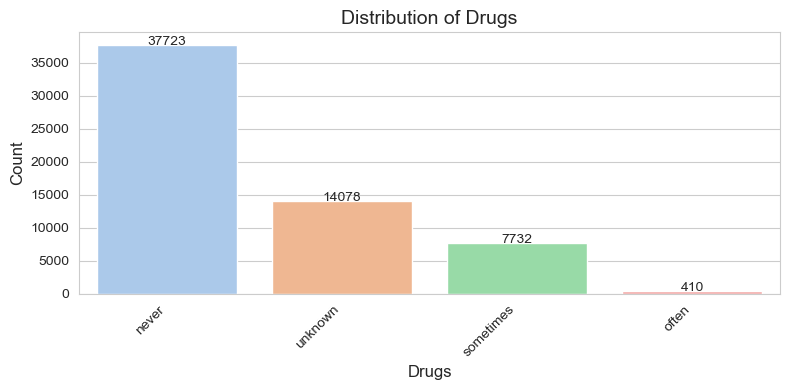

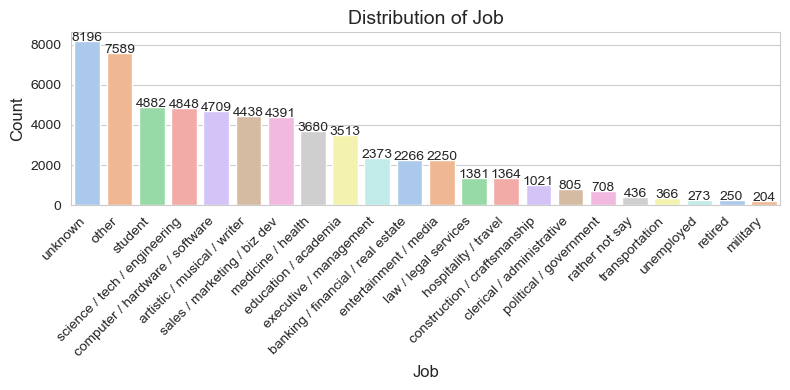

In [12]:
# Iterating the names of the filtered columns to the plotting with the function above
[plot_categorical_distribution(dating_df, column) for column in filtered_columns_low_uniques];

Now, let's address the other categorical variables. They present a greater challenge due to their multiple unique values. Simply using a bar plot won't yield clear insights given the limitations of this visualization for such variables. Instead, we'll employ frequency analysis to navigate this challenge.

In [13]:
def frequency_analysis(df: pd.DataFrame, column: str, top_N: int = 10) -> None:
    """
    Analyze and visualize the frequency distribution of a categorical column in a dataframe.
    
    Args:
        df (pd.DataFrame): The dataframe containing the column to be analyzed.
        column (str): The name of the column in df to be analyzed. It should be of categorical datatype.
        top_N (int): Optional (default = 10). The number of top categories to be displayed and visualized.
        
    Returns:
        None: The function displays the top N categories along with their counts and percentages and plots a bar plot of these categories.
    """

    # Getting the top N categories of the column
    top_categories = df[column].value_counts().head(top_N)
    
    # Displaying the frequencies and percentages
    print(f"<-- Top {top_N} categories in {column} -->\n")
    print(top_categories)
    print("\n<-- Percentages -->\n")
    print((top_categories / len(df) * 100))
    
    # Setting style for Seaborn
    sns.set_style("whitegrid")
    
    # Initialize the figure
    plt.figure(figsize=(8, 4))
    
    # Creating bar plot
    ax = sns.barplot(x=top_categories.index, y=top_categories.values, 
                     palette="pastel")
    
    # Placing the value of each bar on top
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center",
                fontsize=10)

    # Title, axis and labels setting
    ax.set_title(f"Top {top_N} categories in {column}", fontsize=14)
    ax.set_xlabel(column.capitalize(), fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    
    # Adjusting the fontsize of tick labels and rotation
    plt.xticks(rotation=45, ha='right')
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10) 
    
    # Displaying the plot
    plt.tight_layout()
    plt.show()

In [14]:
# Filtering columns based on unique values less than 30 and 'object' datatype
filtered_columns_high_uniques = [col for col in dating_df.columns if dating_df[col].dtype == 'object' and 
                                dating_df[col].nunique() >= 30]

print(filtered_columns_high_uniques)

['education', 'ethnicity', 'location', 'sign']


<-- Top 10 categories in education -->

education
graduated from college/university    23959
graduated from masters program        8961
unknown                               6625
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
Name: count, dtype: int64

<-- Percentages -->

education
graduated from college/university    39.969638
graduated from masters program       14.949202
unknown                              11.052166
working on college/university         9.529053
working on masters program            2.807667
graduated from two-year college       2.554093
graduated from high school            2.382263
graduated from ph.d program           2.122016
graduated from law school             1.871778
working on two-year college           1

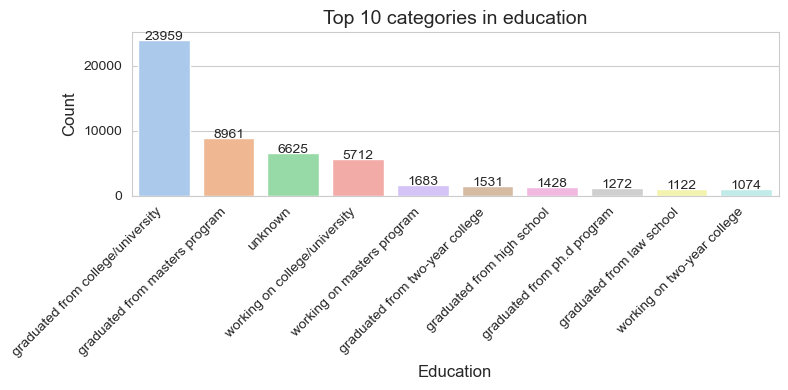

<-- Top 10 categories in ethnicity -->

ethnicity
white                      32831
asian                       6134
unknown                     5679
hispanic / latin            2822
black                       2008
other                       1705
hispanic / latin, white     1301
indian                      1077
asian, white                 811
white, other                 641
Name: count, dtype: int64

<-- Percentages -->

ethnicity
white                      54.770365
asian                      10.233055
unknown                     9.474000
hispanic / latin            4.707806
black                       3.349849
other                       2.844369
hispanic / latin, white     2.170395
indian                      1.796707
asian, white                1.352952
white, other                1.069349
Name: count, dtype: float64


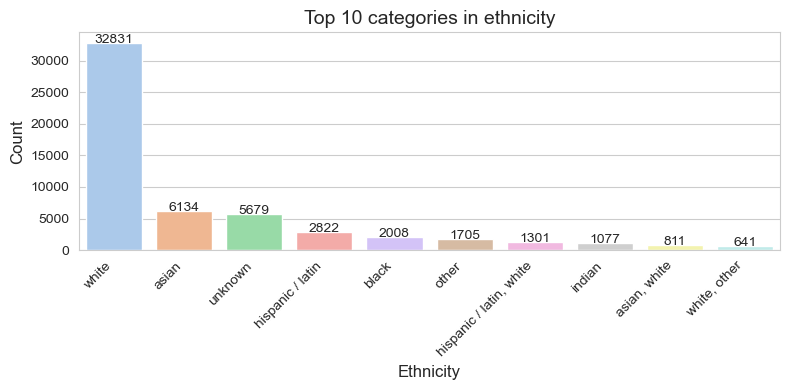

<-- Top 10 categories in location -->

location
san francisco, california    31064
oakland, california           7214
berkeley, california          4210
san mateo, california         1331
palo alto, california         1064
alameda, california            910
san rafael, california         755
hayward, california            747
emeryville, california         738
redwood city, california       693
Name: count, dtype: int64

<-- Percentages -->

location
san francisco, california    51.822565
oakland, california          12.034766
berkeley, california          7.023339
san mateo, california         2.220443
palo alto, california         1.775020
alameda, california           1.518109
san rafael, california        1.259530
hayward, california           1.246184
emeryville, california        1.231170
redwood city, california      1.156098
Name: count, dtype: float64


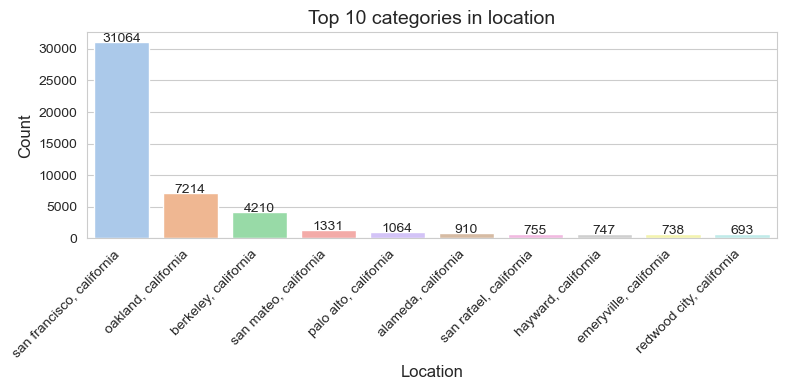

<-- Top 10 categories in sign -->

sign
unknown                                          11054
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
Name: count, dtype: int64

<-- Percentages -->

sign
unknown                                          18.440852
gemini and it&rsquo;s fun to think about          2.972824
scorpio and it&rsquo;s fun to think about         2.956142
leo and it&rsquo;s fun to think about             2.822682
libra and it&rsquo;s fun to think about           2.750947
taurus and it&rsquo;s fun to think about          2.735932
can

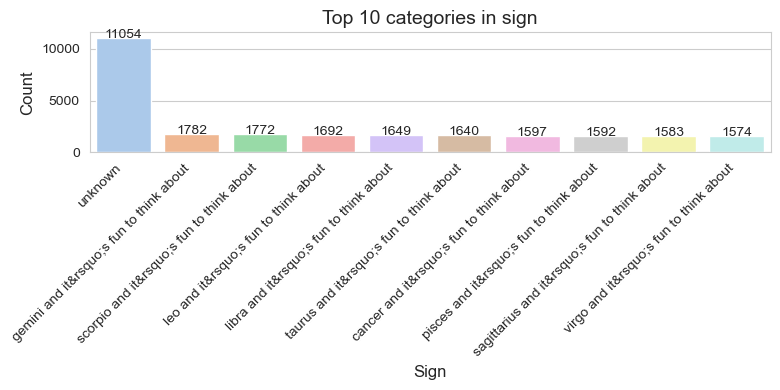

In [15]:
# Iterating the names of the filtered columns to the plotting with the function above
[frequency_analysis(dating_df, column) for column in filtered_columns_high_uniques];

#### **Categorical Analysis: Overall Insights From Features**
* Interestingly, most people identified as white, with its location as California (with the vast majority in San Francisco), this could reveal something about how the data was collected.

* Many users on this dating platform prefer to keep certain personal aspects, such as their job and drug habits, private or unmentioned.

* The platform seems to have a diverse mix of professions, from artists to engineers.
* While drinking socially is the norm, most users indicate that they never use drugs. Which it is kind of expected given this platform is used mostly for social interactions and normalized topics can play a huge role in these.

* Dietary habits are varied, with a significant portion being flexible in their eating choices, but there's also a noticeable presence of specific dietary choices like veganism and vegetarianism.

* The majority of users on this dating platform describe their body type as `average`, `fit`, or `athletic`, suggesting an active or standard demographic.

* Despite being a dating platform, there are individuals who identify as `married`. This could be for a multitude of reasons, such as looking for friends or being in open relationships, but it's an intriguing observation.

* A notable point is the labels like `jacked`, `used up`, and `rather not say` in the body type category. It's fascinating to see how some labels, which can be perceived as negative or humorous, are genuinely used by some individuals, perhaps as a way of being candid or humorous in their profiles.

* There are nearly as many **artists** as there are people in **banking/finance**. Quite a balanced mix of right-brain and left-brain professionals in the dating pool.

* The number of people who mentioned they use drugs **Often** is just slightly more than those in the **Military** profession.

* For the Zodiac signs, the vast majority of entries are labeled as "Unknown," dwarfing the counts of any individual astrological sign. However, when looking at the actual signs, they are all seem to be quite balanced in terms of counts.

Now let's move to the numerical feature analysis by first assigning our helper function for plotting.

In [16]:
def plot_and_examine_data(df: pd.DataFrame, column_name: str) -> None:
    """
    Plots a histogram and a box plot for a specified numerical column in a pandas DataFrame.
    Examines the column for negative values and prints information if any are found.

    Args:
        df (df.DataFrame): pandas DataFrame 
        column_name (str): name of the column to be examined
    
    Returns:
        None: It will just plot the chart and print the number of negative values found on each column
    """

    # Initializing the figure
    plt.figure(figsize=(12, 6))

    # Plotting the histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], 
                 bins=30, 
                 kde=True, 
                 color='skyblue', 
                 edgecolor='black')
    
    # Title, axis and labels setting
    plt.title('Histogram', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Plotting Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column_name], 
                width=0.3, 
                color='lightgreen')
    
    # Title, axis and labels setting
    plt.title('Box Plot', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Displaying the plot
    plt.tight_layout()
    plt.show()

    # Examining for negative values
    negative_values = df[df[column_name] < 0]
    if not negative_values.empty:
        print(f"Found {len(negative_values)} negative values in column '{column_name}'.")
    else:
        print(f"No negative values found in column '{column_name}'.")


In [17]:
# Filtering columns based on numerical datatype
filtered_columns_numerical = dating_df.select_dtypes(include=np.number).columns

print(filtered_columns_numerical)

Index(['age', 'height', 'income'], dtype='object')


In [18]:
# Getting statistics from numerical columns
dating_df[filtered_columns_numerical].describe()

,age,height,income
count,59943.000000,59943.000000,59943.000000
mean,32.340140,68.295281,20034.225197
std,9.452723,3.994803,97348.524902
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### **Numerical Analysis: `age` Variable**

- **Mean Age**: The dataset reveals an average age of 32 years, which is quite typical for dating app demographics. Seems about right!

- **Maximum Age Alert**: Now, here's a fun fact – the oldest user is reported to be 110 years old. Either we've got a super young-at-heart individual here, a comedian in the mix, or maybe just a little typo gremlin. Who knows? 

- **Not a Party Pooper**: Interestingly enough, this centenarian doesn’t throw off our data party too much. The median age is cozying up at 30, just two years shy of the mean. So, all in all, we’re in good statistical shape.

- **Senior Love**: However, just for kicks and possibly cleaner data, let's play detective and snoop around profiles claiming to be over 75. Because, you know, it's never too late for love, but it might be a tad late for this particular dating app.

- **Future-Proofing the Analysis**: Identifying these potential outliers will not only satisfy our curiosity but also set the stage for cleaner, more accurate analyses down the line.

In [19]:
# checking the number of users reporting having more than 75 years of age
outliers_age = len(dating_df[dating_df['age'] >= 75])

print(F"There are {outliers_age} records of people reporting having more than 75 years old using a dating app")

There are 2 records of people reporting having more than 75 years old using a dating app


Only two of them (whatever they are), not a big deal. Let's see now how our `age`, `height` and `income` variables look like graphically and inspect them also for negative values using the function above described

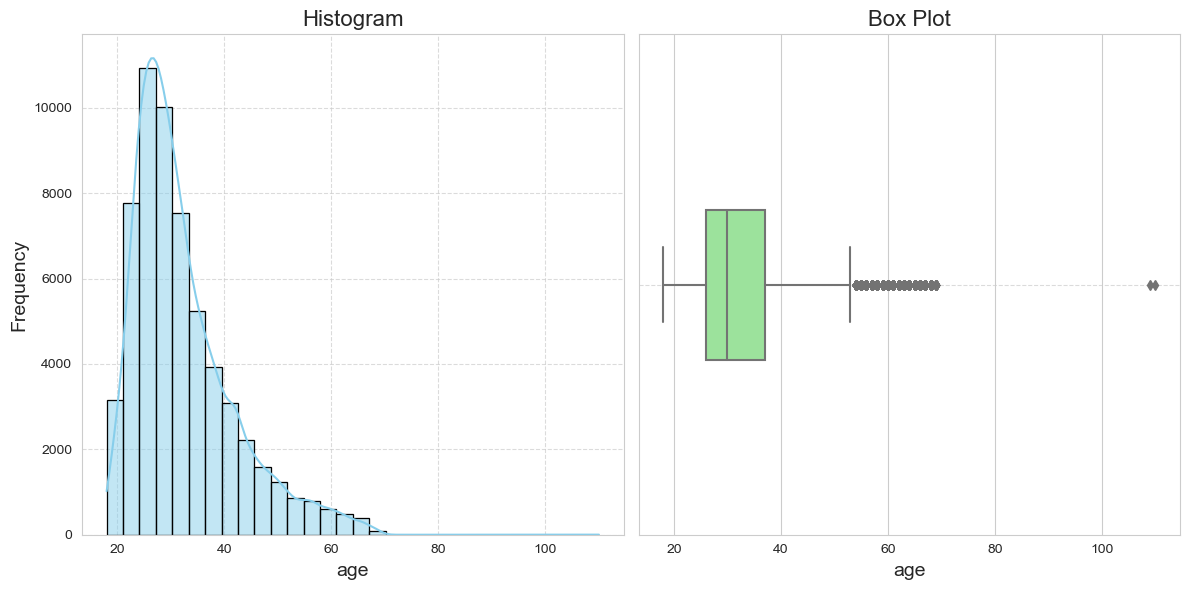

No negative values found in column 'age'.


In [20]:
# Plotting 'age' feature
plot_and_examine_data(dating_df, 'age')

#### **Numerical Analysis: `height` Variable**

- **Average Stature**: The mean height in our dataset stands tall at 68.29 inches. Seems like we’ve got a pretty average crowd! Would this be representative of the San Francisco area?

- **Variety in Heights**: With a standard deviation of 3.99, it looks like we’ve got a nice mix of heights, ensuring our dating pool is diverse.

- **A Little Too Short**: Now, here’s a head-scratcher – the minimum height is listed as a mere 1 inch. Unless we’ve got ants creating dating profiles, there might be a little data mishap here! (Unless we have [Afshin Ghaderzadeh](https://en.wikipedia.org/wiki/Afshin_Esmaeil_Ghaderzadeh) registered on the app).

- **The Usual Suspects**: The 25th, 50th, and 75th percentiles bring us back to reality with heights of 66, 68, and 71 inches, respectively. It’s safe to say, we’re mostly in the realm of human heights here.

- **Sky’s the Limit**: On the other end of the spectrum, the maximum height is an impressive 95 inches. Whether we've got a real-life giant or just a playful spirit entering their height, it adds a bit of fun to our dataset.

- **Statistical Shenanigans**: While the minimum and maximum values provide some amusement, it’s good to keep in mind for future analyses that these could be outliers or data entry errors. A little clean-up might be in order to keep our data looking sharp and accurate! Let's do that.


In [21]:
# Checking the number of users that reported a height less than 10 inch or greater than 90 inch
outliers_height = len(dating_df[(dating_df['height'] < 10) | 
                     (dating_df['height'] > 90)])

print(f"The number of users reporting a height lower than 10 inch or greater than 90 inch is: {outliers_height}")

The number of users reporting a height lower than 10 inch or greater than 90 inch is: 34


Well, we definetely have a couple of outliers here that we need to address for future steps! For now, let's just visualize the distribution of this feature

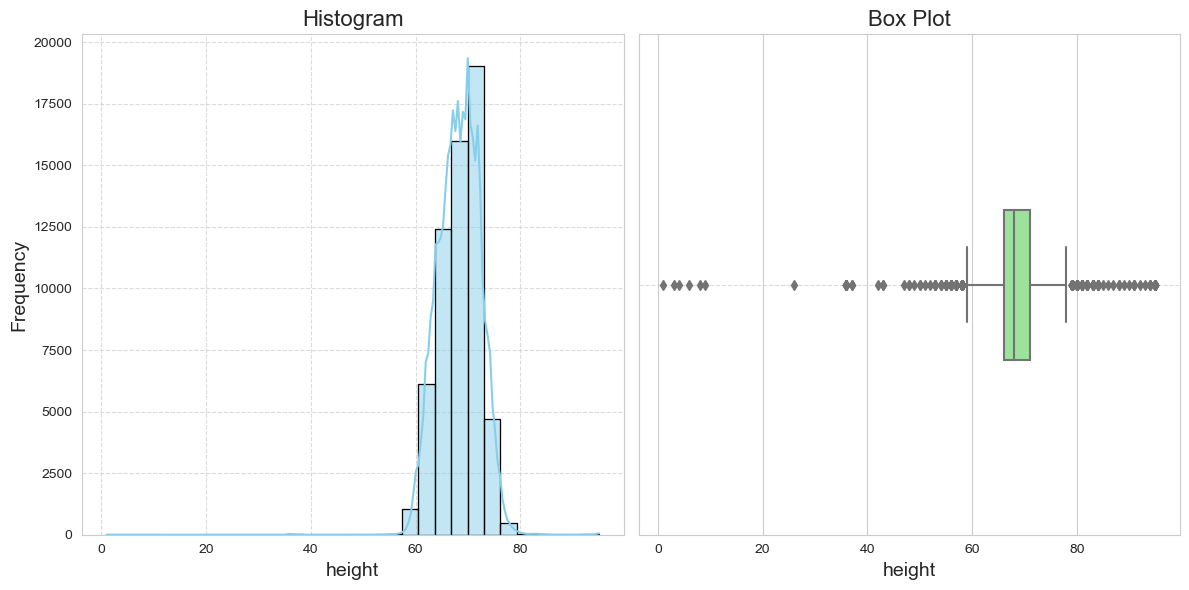

No negative values found in column 'height'.


In [22]:
# Plotting 'height' feature
plot_and_examine_data(dating_df, 'height')

#### **Numerical Analysis: `income` Variable**

- **Average Earnings**: Cha-ching! The average income in our dataset rings in at $20,034.23. Not too shabby!

- **Rolling in Dough or Just Doughnuts?**: Hold onto your hats, though—the standard deviation is a whopping $97,348.52. Seems like we've got a mix of penny savers and big spenders!

- **Money Mystery**: Now, here’s where it gets intriguing. A bunch of profiles have an income listed as -$1. Unless they’re paying us for the pleasure of dating them, or with servere debts, it looks like we’ve got some missing or undisclosed values on our hands. The -$1, however, can represent the value for "No Income".

- **Middle-Class Majority**: The 25th, 50th, and 75th percentiles are also lounging at -$1.

- **Millionaire Match**: On the flip side, the maximum income is a cool $1,000,000. Are we running a dating app or a millionaire’s club? Either way, it adds a dash of extravagance to our dataset.

- **Fiscal Fun and Games**: While these income disparities provide some financial fun, it’s clear we might need to tidy up these numbers for a more accurate analysis in future escapades.


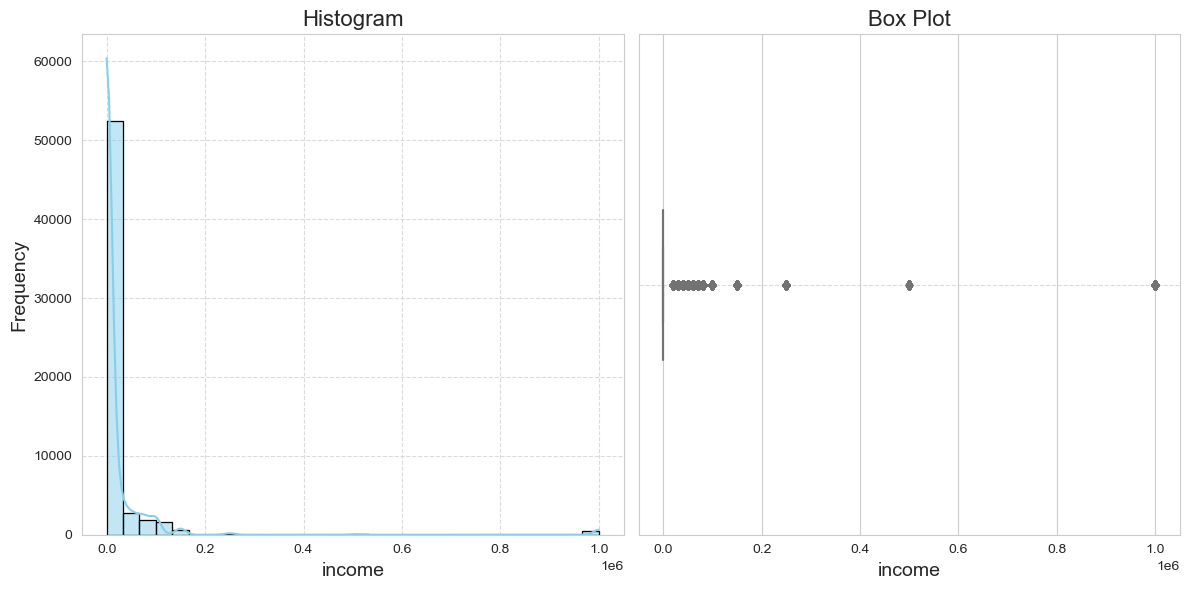

Found 48439 negative values in column 'income'.


In [23]:
# Plotting 'income' feature
plot_and_examine_data(dating_df, 'income')

### 3. **Bivariate/Multivariate Analysis**:
   - **Objective**: Understand relationships and correlations between variables.
   - Actions to Take:
   
     - Pair plots to visualize pair-wise relationships between numerical variables.
     - Check how numerical variables vary with other numerical variables using scatter plots or correlation matrices.
     - Compute heatmaps to see correlation between features.
     - Analyze relationships between categorical and numerical variables using boxplots.
       - How does `age` vary across different `status` categories?
     - For categorical vs. categorical variables: cross-tabulation or stacked bar charts can be helpful.
       - How do `sex` and `orientation` relate?
       - Distribution of `diet` across `sex` or `orientation`.

c:\Users\pablo\.conda\envs\python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


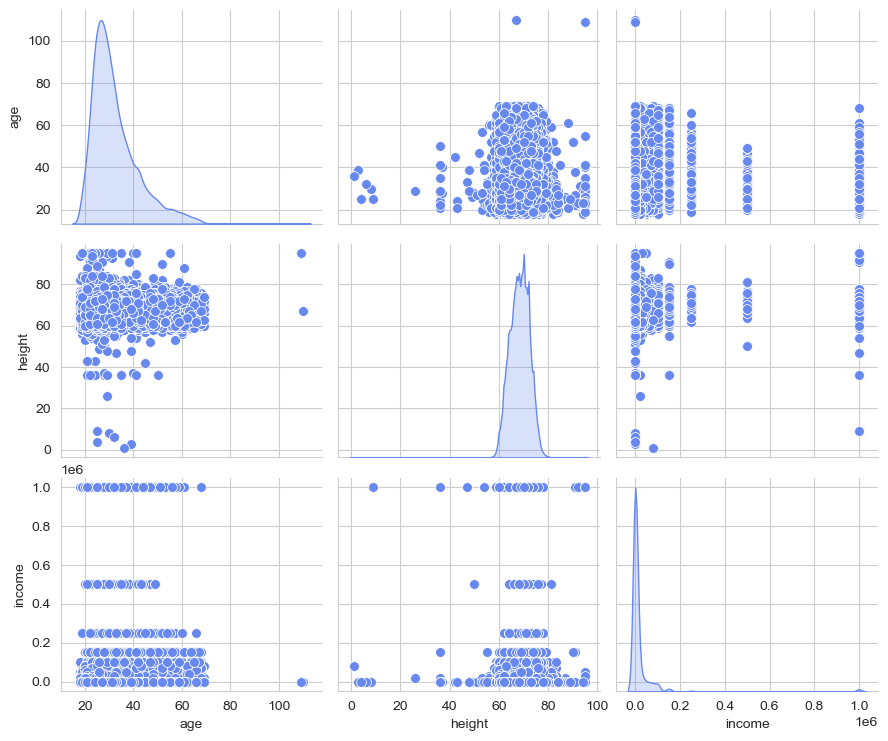

<Figure size 640x480 with 0 Axes>

In [24]:
# Setting up the style for Seaborn
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Creating the pair plot
sns.pairplot(dating_df[['age', 'height', 'income']], 
             height=2.5, 
             aspect=1.2, 
             plot_kws={'s': 50, 'edgecolor': 'white'}, 
             diag_kind='kde')

# Displaying the plot
plt.show()
plt.tight_layout()

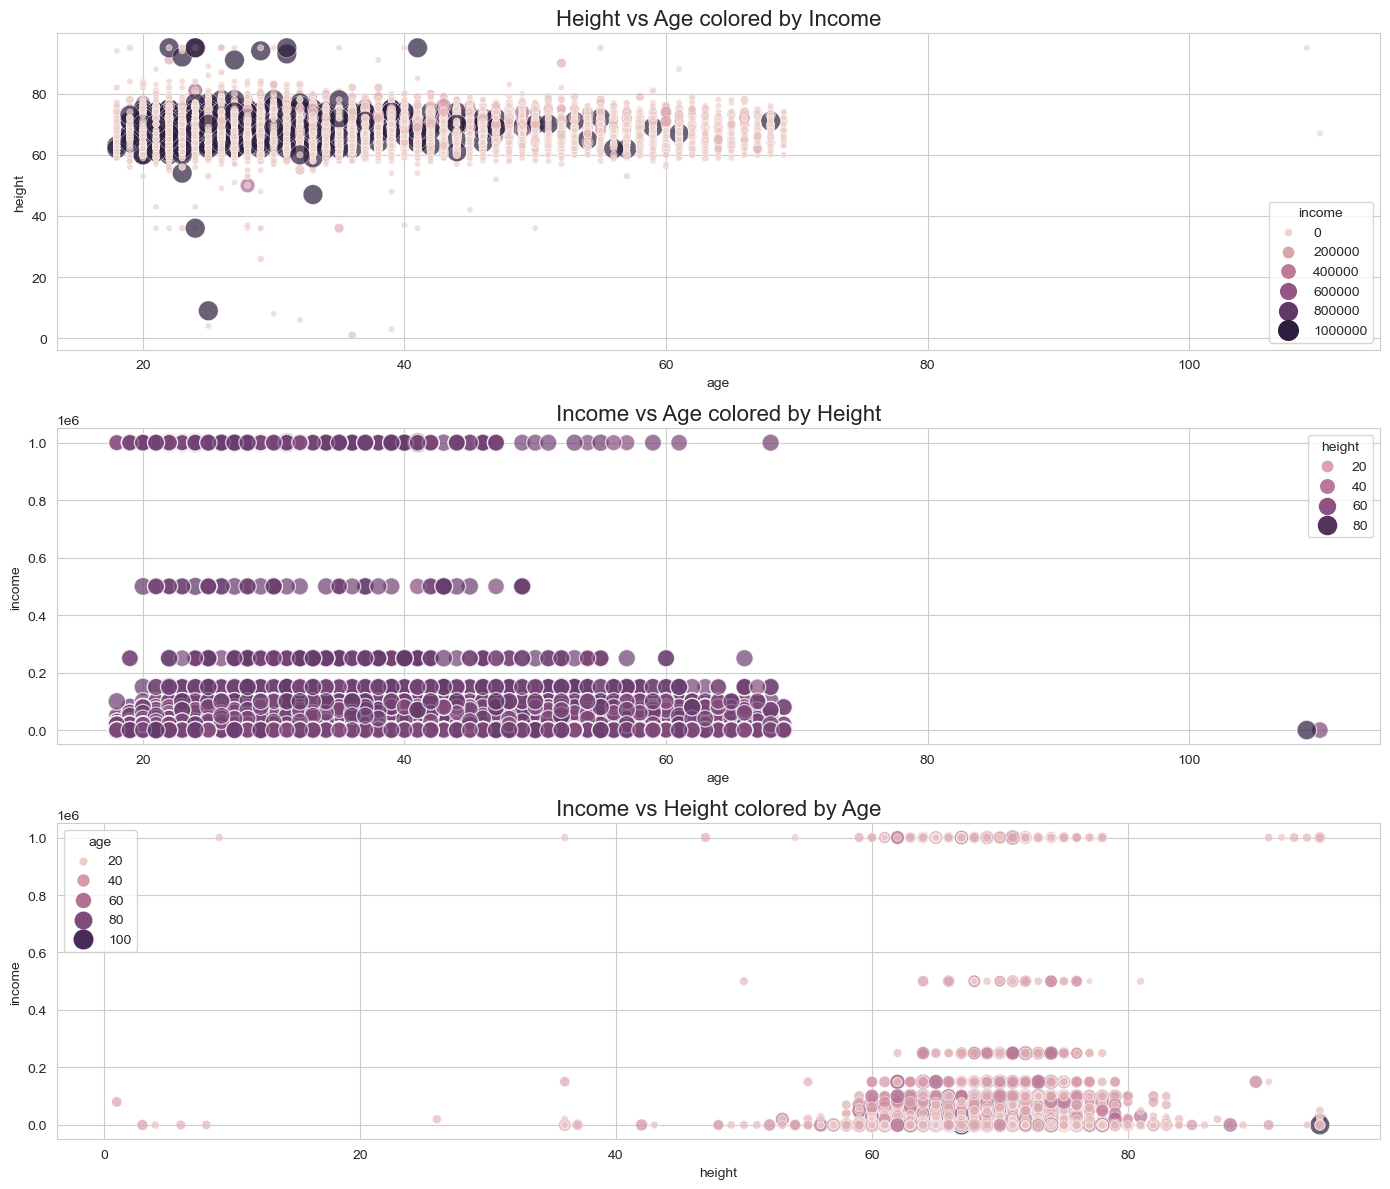

In [25]:
# Setting up the style for Seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Initializing the figure
plt.figure(figsize=(14, 12))

# Plotting scatter plots for the combinations of variables in a 3x1 figure
plt.subplot(3, 1, 1)
sns.scatterplot(data=dating_df, 
                x='age', y='height', 
                hue='income', 
                size='income', 
                alpha=0.7, 
                sizes=(20, 200))
plt.title('Height vs Age colored by Income', fontsize=16)

plt.subplot(3, 1, 2)
sns.scatterplot(data=dating_df, 
                x='age', y='income', 
                hue='height', 
                size='height', 
                alpha=0.7, 
                sizes=(20, 200))
plt.title('Income vs Age colored by Height', fontsize=16)

plt.subplot(3, 1, 3)
sns.scatterplot(data=dating_df, 
                x='height', y='income', 
                hue='age', 
                size='age', 
                alpha=0.7, 
                sizes=(20, 200))
plt.title('Income vs Height colored by Age', fontsize=16)

# Displaying the plot
plt.tight_layout()
plt.show()


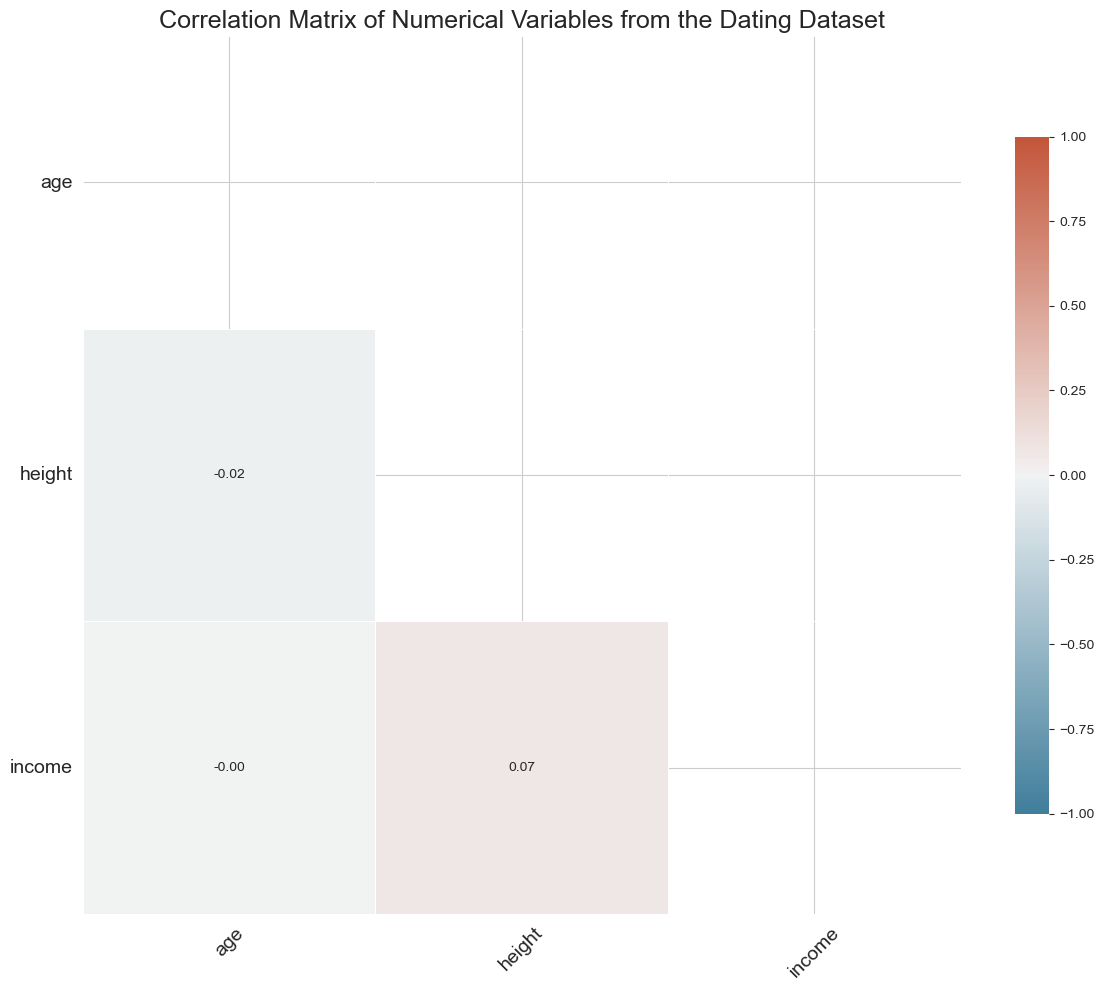

In [26]:
# Calculating the correlation matrix
corr_matrix = dating_df[['age', 'height', 'income']].corr()

# Setting up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generating a mask for the upper triangle, avoiding 1s in the feature self comparisson
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Selecting a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio, setting the annotation format
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap=cmap, 
            square=True, 
            linewidths=.5, 
            vmin=-1, vmax=1,
            mask=mask, 
            cbar_kws={"shrink": 0.75})

# Title and axis label configurations
plt.title('Correlation Matrix of Numerical Variables from the Dating Dataset', fontsize=18)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=45, fontsize=14)

# Displaying the plot
plt.tight_layout()
plt.show()



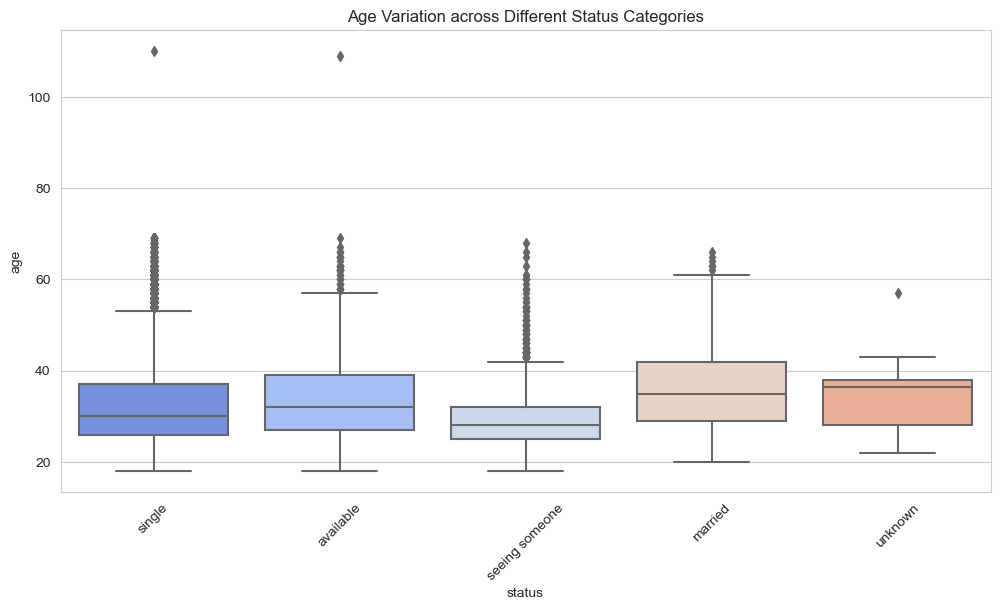

In [27]:
# Setting up the style for Seaborn
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Plotting the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='status', y='age', data=dating_df)
plt.title('Age Variation across Different Status Categories')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


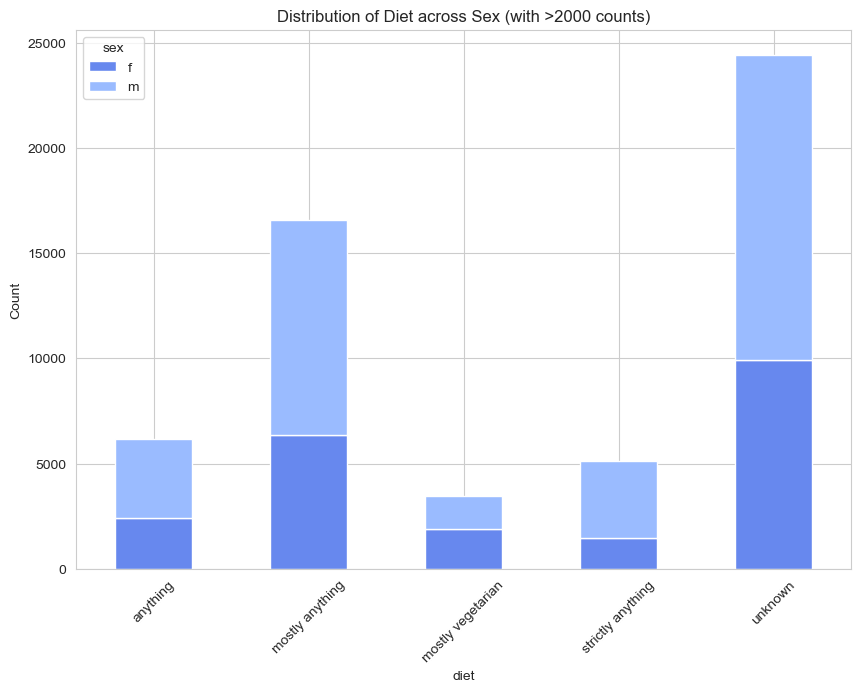

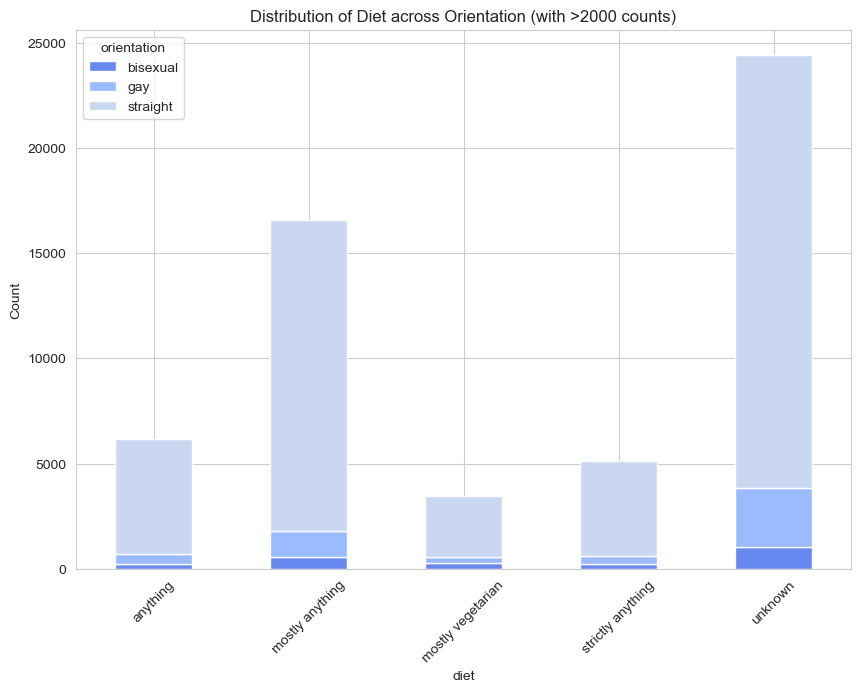

In [28]:
# Filtering dataset to include only diet categories with more than 2000 count values
diet_counts = dating_df['diet'].value_counts()
relevant_diets = diet_counts[diet_counts > 2000].index
filtered_df = dating_df[dating_df['diet'].isin(relevant_diets)]

# Computing diet distribution across sex
ct_diet_sex = pd.crosstab(filtered_df['diet'], filtered_df['sex'])

# Plotting stacked bar chart
ct_diet_sex.plot(kind='bar', 
                 stacked=True, 
                 figsize=(10, 7))

plt.title('Distribution of Diet across Sex (with >2000 counts)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

# Computing diet distribution across orientation
ct_diet_orientation = pd.crosstab(filtered_df['diet'], filtered_df['orientation'])

# Plotting stacked bar chart
ct_diet_orientation.plot(kind='bar', 
                         stacked=True, 
                         figsize=(10, 7))

plt.title('Distribution of Diet across Orientation (with >2000 counts)')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


## **Future Work**

### 3. **Bivariate/Multivariate Analysis**:

   - **Commenting insights we can extract from this analysis based on the plots graphed above.**
   
### 4. **Outlier Detection**:
   - **Objective**: Detect data points that fall far from the pack.
   - Actions to Take:

     - Use boxplots and scatter plots.
     - Apply methods like the IQR method or Z-score method.
     - Decide on an approach: cap/floor, remove, or keep.
     
### 5. **Feature Engineering and Transformation**:
   - **Objective**: Derive new features or transform existing ones for better insights or modeling.
   - Actions to Take:

     - Convert categorical variables with too many unique values (like `location`) into broader categories or use feature hashing.
     - Apply transformations like log-transform on skewed variables (like `income` if it's highly skewed).
     - Extract zodiac element (fire, water, air, earth) from `sign` for a more general category.

### 6. **Text Analysis**:
   - **Objective**: Extract insights from text data.
   - Actions to Take:

     - If there are open-text profile descriptions or any other text data, you could use text analytics techniques to gain insights. For instance, tokenization, sentiment analysis, etc.

### 7. **Aggregate Insights**:
   - **Objective**: Combine and aggregate data for deeper insights.
   - Actions to Take:

     - Group data by categorical variables to find mean or median of numerical variables.
     - For instance, average `height` or `income` by `job` type or `orientation`.
     - Geographic visualizations if location data is fit for that.